M0 (rho_DM0) = 2.30e-27 kg/m^3
N0 (rho_DE0) = 5.80e-27 kg/m^3
R0 (rho_rad0) = 7.25e-31 kg/m^3
Valores de t_applied (s):
z=0.0: t_applied=4.6e+17 s
z=4000.0: t_applied=1.3e+12 s
Redshift donde rho_DM = rho_DE: z_eq = 0.35
Redshift donde rho_rad = rho_DM: z_eq = 3175.47


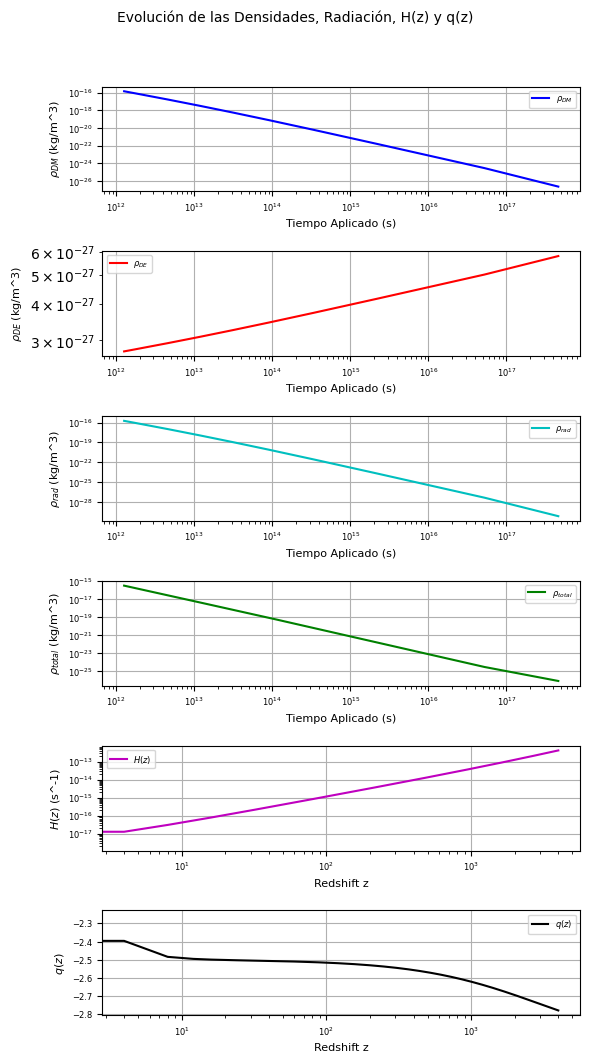

Tiempo de ejecución: 4.088 segundos


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import time
import pandas as pd

# Iniciar el cronómetro
start_time = time.time()

# Constantes cosmológicas (valores de ejemplo basados en parámetros típicos)
H0 = 67.4  # Constante de Hubble en km/s/Mpc
H0 = H0 * 3.24078e-20  # Convertir a s^-1 (1 km/s/Mpc = 3.24078e-20 s^-1)
Omega_m0 = 0.27  # Densidad de materia oscura hoy
Omega_DE0 = 0.68  # Densidad de energía oscura hoy
Omega_rad0 = 8.5e-5  # Densidad de radiación hoy (valor típico para CMB + neutrinos)
rho_c0 = 3 * H0**2 / (8 * np.pi * 6.67430e-11)  # Densidad crítica hoy (en kg/m^3)
M0 = Omega_m0 * rho_c0  # Densidad de materia oscura hoy (rho_DM0)
N0 = Omega_DE0 * rho_c0  # Densidad de energía oscura hoy (rho_DE0)
R0 = Omega_rad0 * rho_c0  # Densidad de radiación hoy (rho_rad0)

# Imprimir M0, N0 y R0
print(f"M0 (rho_DM0) = {M0:.2e} kg/m^3")
print(f"N0 (rho_DE0) = {N0:.2e} kg/m^3")
print(f"R0 (rho_rad0) = {R0:.2e} kg/m^3")

# Rango de redshift z (extendido para capturar la transición radiación-materia)
z = np.linspace(0, 4000, 1000)

# Modelo cosmológico: ecuaciones para rho_DM, rho_DE y rho_rad
# rho_DM(z) = rho_DM0 * (1+z)^3
rho_DM = M0 * (1 + z)**3

# rho_DE(z) = rho_DE0 * (1+z)^(3*(1+w)), con w = -1.03 (por ejemplo)
w0 = -1.03
rho_DE = N0 * (1 + z)**(3 * (1 + w0))

# rho_rad(z) = rho_rad0 * (1+z)^4
rho_rad = R0 * (1 + z)**4

# Densidad total
rho_total = rho_DM + rho_DE + rho_rad

# Calcular H(z)
def H(z, H0, Omega_m0, Omega_DE0, Omega_rad0, w0):
    return H0 * np.sqrt(Omega_m0 * (1 + z)**3 + Omega_DE0 * (1 + z)**(3 * (1 + w0)) + Omega_rad0 * (1 + z)**4)

H_z = H(z, H0, Omega_m0, Omega_DE0, Omega_rad0, w0)

# Calcular t_applied usando un bucle con quad
t_applied = np.zeros_like(z)
for i in range(len(z)):
    integrand = lambda zp: 1 / ((1 + zp) * H(zp, H0, Omega_m0, Omega_DE0, Omega_rad0, w0))
    t, _ = quad(integrand, z[i], np.inf, epsabs=1e-6, epsrel=1e-6)
    t_applied[i] = t

# Imprimir algunos valores de t_applied
print("Valores de t_applied (s):")
print(f"z={z[0]:.1f}: t_applied={t_applied[0]:.1e} s")
print(f"z={z[-1]:.1f}: t_applied={t_applied[-1]:.1e} s")

# Calcular el redshift donde rho_DM = rho_DE
# rho_DM(z) = M0 * (1 + z)**3
# rho_DE(z) = N0 * (1 + z)**(3 * (1 + w0))
# (1 + z)**(3 - 3 * (1 + w0)) = N0 / M0
z_eq_DM_DE = (N0 / M0)**(-1 / (3 * w0)) - 1
print(f"Redshift donde rho_DM = rho_DE: z_eq = {z_eq_DM_DE:.2f}")

# Calcular el redshift donde rho_rad = rho_DM
# rho_rad(z) = R0 * (1 + z)**4
# rho_DM(z) = M0 * (1 + z)**3
# R0 * (1 + z)**4 = M0 * (1 + z)**3
# R0 * (1 + z) = M0
# 1 + z = M0 / R0
z_eq_rad_DM = (M0 / R0) - 1
print(f"Redshift donde rho_rad = rho_DM: z_eq = {z_eq_rad_DM:.2f}")

# Calcular el parámetro de desaceleración q(z)
# q(z) = -a''/a / (a'/a)**2 = - (dH(z)/dz * (1+z) + H(z)) / H(z)
# Primero, calculamos la derivada de H(z) numéricamente
dHdz = np.gradient(H_z, z)
q_z = -((dHdz * (1 + z) + H_z) / H_z)

# Graficar rho_DM, rho_DE, rho_rad, rho_total, H(z) y q(z)
plt.figure(figsize=(6, 10.8))  # Reducido un 40% (ancho: 10 -> 6, alto: 18 -> 10.8)

# Gráfico de rho_DM
plt.subplot(6, 1, 1)
plt.plot(t_applied, rho_DM, 'b-', label=r'$\rho_{DM}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)', fontsize=8)
plt.ylabel(r'$\rho_{DM}$ (kg/m^3)', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Gráfico de rho_DE
plt.subplot(6, 1, 2)
plt.plot(t_applied, rho_DE, 'r-', label=r'$\rho_{DE}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)', fontsize=8)
plt.ylabel(r'$\rho_{DE}$ (kg/m^3)', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Gráfico de rho_rad
plt.subplot(6, 1, 3)
plt.plot(t_applied, rho_rad, 'c-', label=r'$\rho_{rad}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)', fontsize=8)
plt.ylabel(r'$\rho_{rad}$ (kg/m^3)', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Gráfico de rho_total
plt.subplot(6, 1, 4)
plt.plot(t_applied, rho_total, 'g-', label=r'$\rho_{total}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)', fontsize=8)
plt.ylabel(r'$\rho_{total}$ (kg/m^3)', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Gráfico de H(z)
plt.subplot(6, 1, 5)
plt.plot(z, H_z, 'm-', label=r'$H(z)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Redshift z', fontsize=8)
plt.ylabel(r'$H(z)$ (s^-1)', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Gráfico de q(z)
plt.subplot(6, 1, 6)
plt.plot(z, q_z, 'k-', label=r'$q(z)$')
plt.xscale('log')
plt.xlabel('Redshift z', fontsize=8)
plt.ylabel(r'$q(z)$', fontsize=8)
plt.legend(fontsize=6)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=6)

# Título general para los gráficos
plt.suptitle("Evolución de las Densidades, Radiación, H(z) y q(z)", fontsize=10)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()

# Guardar los datos en un archivo CSV en el escritorio
datos = pd.DataFrame({
    'Tiempo_Aplicado_s': t_applied,
    'Redshift_z': z,
    'rho_DM_kg_m3': rho_DM,
    'rho_DE_kg_m3': rho_DE,
    'rho_rad_kg_m3': rho_rad,
    'rho_total_kg_m3': rho_total,
    'H_z_s^-1': H_z,
    'q_z': q_z
})
datos.to_csv(r'C:\Users\los percu\Desktop\datos_densidades_desaceleracion.csv', index=False)

# Calcular y mostrar el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time:.3f} segundos")